<a href="https://colab.research.google.com/github/Tower5954/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we are going to simplify it:
Predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [1]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating data to view and fit

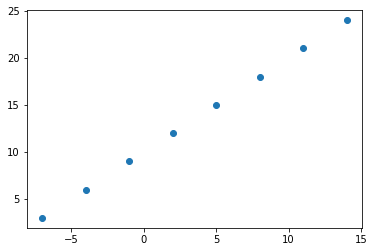

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0 ])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualise it

plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Inputs and output shape

In [4]:
# Create a demo tensor for a housing price prediction problem 

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [14]:
# Turn our Numpy arrays into tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

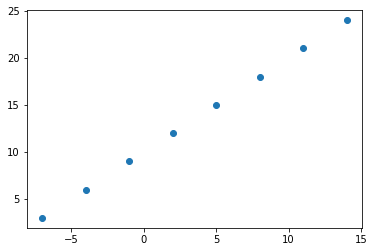

In [16]:
plt.scatter(X, y)

In [17]:
X.ndim

1

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (In other words, the function which tell our model how wrong it is.) and the optimizer (tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - Letting a model find patterns between X & y (features and labels)  

In [13]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model 
model.fit(X, y, epochs=5)


Epoch 1/5


ValueError: ignored

In [ ]:
# Try and make a prediction using our model 
model.predict([17.0])

In [ ]:
y_pred = model.predict([17.0])
y_pred

In [ ]:
y_pred +11

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers,
increase thenumber of hidden units (also called neurons)
within each of the hidden layer, change the activation
function of each layer.

2. **Compiling a model** - Here we might change the optimization function or 
perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - Here we might fit a model for more **epochs**
(leave it training for longer) or on more data (give the model more examples
to learn from)

**Rebuild our model**

In [ ]:
# 1. Create the model 

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we will train for longer)
model.fit(X, y, epochs=100)

Remind ourselves of the data.

In [ ]:
X, y

See if our model's prediction has improved.



In [ ]:
model.predict([17.0])

See if we can improve our model.




In [ ]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model

model.fit(X, y, epochs=100)

In [ ]:
model.predict([17.0])

**Common ways to improve a deep model:**

* Adding layers # We added 1 to the previous model 
* Increase the number of hidden units # our layers above are 100
* Change the activation functions # activation= relu 
* Change the optimizer function # SGD 

 #-----Could be the most important one -------#
* **Change the learning rate # (lr=...) or (learning_rate=...)**

* Fitting on more data
* Fitting for longer

Adjusting:

In [ ]:
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model

model.fit(X, y, epochs=100)

In [ ]:
X, y

In [ ]:
model.predict([17.0])

## Evaluating a model

In practice, a typical workflow you will go through when building neural networks is:   
```
Build a model -> fit it -> evaluate it -> tweak a model ->
fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

When it comes to evaluation...

> " Visualise, visualise, visualise"

It's a good idea to visualise:
* The data - what data are we working with? What does it look like?
* The model itself - what does the model look like?
* The training of a model - how does a model perform while it learns?
* The prediction of the model - how do the predictions of a model line up 
against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset 

X = tf.range(-100, 100, 4)
X

In [ ]:
# Make labels for the dataset

y = X + 10
y

In [ ]:
# Visualise the data
import matplotlib.pyplot as plt

plt.scatter(X, y);

### The 3 sets...

* **Training set**   - the model learns from this data, which is typically 70-80 % of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% 
of the data.
* **Test set** - the model gets evaluated on this data to test what is has learned,
this set is typically 10-15% of the total data availability.

In [ ]:
# Check the length of samples we have
len(X)

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test)

In [ ]:
len(y_train), len(y_test)

### Visualise the data

Now that we have our data into training and test sets. Let us visualise it.

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(X_train, y_train, c='g', label="Training data")

plt.scatter(X_test, y_test, c='b', label='Test data')

plt.legend();

In [ ]:
# How to build a neural network for our data

# 1. Create a m ode

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model

# model.fit(X_train, y_train, epochs=100)



### Visualising the model 

The following code will error out:

In [ ]:
#-------------error out---------------#

# model.summary()

In [ ]:
# Create a model which builds automatically by defining the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])



In [ ]:
model.summary()

* Total params - total number of params in the model.
* Trainable params - these are the parameters (patterns)
the model can update as it trains.
* Non-trainable params - these parameters are not updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

📖 **Resource:** 📖

For a more in-depth overview of the trainable parameters within a layer, check out MIT's Introduction to deep-learning video:

http://introtodeeplearning.com/

In [ ]:
# Fitting our model to the training data

model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of the model 

model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model



In [ ]:
plot_model(model=model)

In [ ]:
plot_model(model=model, show_shapes=True)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

In [ ]:
plot_model(model=model, show_shapes=True)

### Visualising our model's predictions

To visualise predictions, it's a good idea to plot them against the ground truth labels.

Often we will see this in the form `y_test` or `y_true` vs. `y_pred`(ground truth versus your model's predictions).

In [41]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

array([[ 9.857784  ],
       [ 4.9637904 ],
       [15.475494  ],
       [ 9.406462  ],
       [-1.175958  ],
       [ 1.7386456 ],
       [ 0.8929988 ],
       [12.46581   ],
       [ 5.6774383 ],
       [ 9.756723  ],
       [ 5.06475   ],
       [ 6.5093055 ],
       [ 3.6058762 ],
       [ 6.746248  ],
       [11.533589  ],
       [ 7.7626243 ],
       [ 7.5251927 ],
       [ 8.408972  ],
       [ 9.731224  ],
       [ 8.341005  ],
       [ 3.388565  ],
       [ 7.2338476 ],
       [-0.6160002 ],
       [-1.4752293 ],
       [10.445504  ],
       [11.014806  ],
       [12.465215  ],
       [ 2.1136413 ],
       [10.213572  ],
       [-0.5736726 ],
       [ 7.379663  ],
       [11.688278  ],
       [-0.40930158],
       [ 5.5065527 ],
       [ 1.9509578 ],
       [ 6.1191664 ],
       [ 1.2895727 ],
       [ 7.9687805 ],
       [12.122374  ],
       [ 4.7771106 ],
       [ 0.50211143],
       [-0.216277  ],
       [11.045195  ],
       [13.593981  ],
       [ 3.443961  ],
       [13

In [42]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

🔑 **Note:** If you feel like you are going to reuse some kind of functunality in the future, it is a good idea to turn it into a function.🔑 

In [43]:
# Create a plotting function

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                     ):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """

  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot test data in green 
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')

  # Show the legend
  plt.legend();


In [ ]:
plot_predictions()

In [ ]:
model.predict([17.0])

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem we are working on, there will be different evaluation metrics to evaluatethe model's performance.

Since we are working on regression, two of the main metrics are:
* MAE - Mean Absolute Error, "On average, how wrong is each of my model's predictions".
* MSE - Mean Squared Error, "Square the average error".

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred )
mae

In [ ]:
tf.squeeze(y_pred)

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

In [ ]:
# Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))

mse

In [ ]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make the model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give the model more of a chance to find patterns in the data.  



In [ ]:
X_train, y_train

We will do 3 model experiments:

1. `model_1` - same as the original model. 1 layer, trained with 100 epochs.
2. `model_2` - 2 layers trained with 100 epochs.
3. `model_3` - 2 layers trained with 500 epochs.

**Build `model_1`**

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model

model_1.fit(X_train, y_train, epochs=100)



In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)

mae_1, mse_1

**Build `model_2`**

* 2 dense layers, trained with 100 epochs

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. Fit the model

model_2.fit(X_train, y_train, epochs=100)


In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_1 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)

mae_1, mae_2, mse_1, mse_2

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_2_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_2_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
# 3. Fit the model

model_2_1.fit(X_train, y_train, epochs=100)

In [ ]:
# Make and plot predictions for model_2_1
y_preds_2_1 = model_2_1.predict(X_test)
plot_predictions(predictions=y_preds_2_1)

In [ ]:
mae_2_1 = mae(y_test, y_preds_2_1)
mse_2_1 = mse(y_test, y_preds_2_1)

mae_1, mae_2, mae_2_1, mse_1, mse_2, mse_2_1

**Build `model_3`** \
 
2 layers trained with 500 epochs.

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model

model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. fit the model
model_3.fit(X_train, y_train, epochs=500 )

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)

mae_1, mae_2, mae_2_1, mae_3, mse_1, mse_2, mse_2_1, mse_3

### Comparing the results of the experiments

Now that we have ran a few experiments, we will compare the results.

🔑 **Note** You should start with small experiments (small models)  and make sure they work and then increase their scale when necessary. 🔑

Let's compare our model's results using a Pandas dataframe

In [ ]:
import pandas as pd

model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_2.1', mae_2_1, mse_2_1],
                 ['model_3', mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=['Model', 'mae', 'mse'])

In [ ]:
all_results

In [ ]:
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_2.1', mae_2_1.numpy(), mse_2_1.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=['Model', 'mae', 'mse'])

In [ ]:
all_results

In [ ]:
model_2.summary()

🔑 **Note:** One of your main goals should be to minimise the time between your experiments. The more experiments you do, the more things you will figure out which do not work and in turn approach closer to working out what will work. When in doubt, remember the machine learning practioner's motto: "Experiment, experiment, experiment" 🔑

### Tracking experiments

A good habit in machine learning modelling is to track the results from the experiments.

When doing so, it can become tedious if running numerous experiments.

Luckily, there are tools to help.

📖 **Resource:** 📖
* TensorBoard - a componentof the Tensorflow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard)

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) and use them in a web application or a mobile app.

There are two main formats we can save our models too:
1. The SavedModel format.
2. The HDF5 format.

Save the model using the SavedModel format

In [ ]:
model_2.save("best_model_SavedModel_format")

Save the model using the HDF5 format

In [ ]:
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model 

Load in the SavedModel format model

In [ ]:
loaded_saved_model_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_saved_model_format.summary()

In [ ]:
model_2.summary()

Compare model_2 predictions with loaded_saved_model_format predictions

In [ ]:
model_2_preds = model_2.predict(X_test)
loaded_saved_model_format_preds = loaded_saved_model_format.predict(X_test)

In [ ]:
model_2_preds == loaded_saved_model_format_preds

In [ ]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_saved_model_format_preds)

Load in a model using the .h5 format

In [ ]:
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')

In [ ]:
loaded_h5_model_pred = loaded_h5_model.predict(X_test)

In [ ]:
loaded_saved_model_format_preds == loaded_h5_model_pred

In [ ]:
loaded_h5_model.summary()

In [ ]:
model_2.summary()

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
1. Go to the "files" tab and right click on the file you are after and click download.

## Larger example

In [18]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
# Read in the data

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [20]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


one-hot encode our Dataframe so it is all numbers

In [21]:
pd.get_dummies(insurance)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [22]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [23]:
# Create a X & y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [27]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [26]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [29]:
# Create training and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

**Build a neural network**

In [45]:
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10),
                                       tf.keras.layers.Dense(1)
])

# 2. compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])
# 3. fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [34]:
# Check the results of the insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [35]:
y_train.median()

9575.4421

In [36]:
y_train.mean()

13346.089736364489

### Experimenting

This model is not performing too well, we should try and improve it.

**model_2**

In [48]:
tf.random.set_seed(42)

# 1. Create model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(512, activation='relu'),
                                         tf.keras.layers.Dense(10, activation='softmax'),
                                       
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=['mae'])

# 3. Fit the model

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9893 - mae: 13345.9893
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9902 - mae: 13345.9902
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9893 - mae: 13345.9893
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9893 - mae: 13345.9893
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9893 - mae: 13345.9893
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9893 - mae: 13345.9893
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9883 - mae: 13345.9883
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9893 - mae: 13345.9893
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.9893 - mae: 13345.9893
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.98

In [49]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 12968.2168 - mae: 12968.2168


[12968.216796875, 12968.216796875]

**model_3**

In [50]:
tf.random.set_seed(42)

# 1 Create model

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model

model_3.fit(X_train, y_train, epochs=100, verbose=0)

In [51]:
model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: nan - mae: nan


[nan, nan]

**model_4** 

* Using the Adam optimizer

In [52]:
tf.random.set_seed(42)

# 1 Create model

model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model

model_4.fit(X_train, y_train, epochs=100, verbose=0)

In [53]:
model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

**model_5**
* `model_4` but training for longer (200 epochs)

In [57]:
tf.random.set_seed(42)

# 1 Create model

model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model

history = model_5.fit(X_train, y_train, epochs=200, verbose=0)

In [58]:
model_5.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3665.3799 - mae: 3665.3799


[3665.3798828125, 3665.3798828125]

### Plot history (also known as a training curve or loss curve)  

Text(0.5, 0, 'epochs')

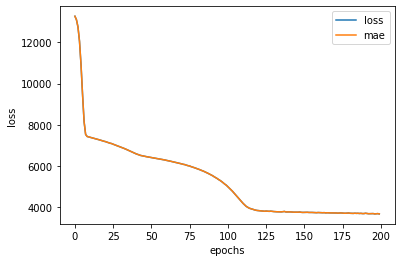

In [59]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**model_6**
* `model_5` but with more epochs (300) 

In [60]:
tf.random.set_seed(42)

# 1 Create model

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model

model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model

history = model_6.fit(X_train, y_train, epochs=300, verbose=0)

In [61]:
model_6.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3215.8608 - mae: 3215.8608


[3215.86083984375, 3215.86083984375]

Text(0.5, 0, 'epochs')

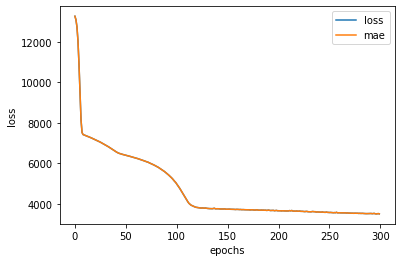

In [63]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔**Question:** How long should you train for? 🤔

It depends. Really... it depends on the problem you are working on. 
However, many people have asked this question before... so TensorFlow
has a solution. 
It is called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), 
which is a TensorFlow component you may add to your model to stop training once it has stopped improving on a certain metric.

**model_7**
* `model_6` with a `EarlyStopping callback`

In [68]:
# Set random seed
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
# This callback will stop the training when there is no improvement in
# the loss for ten consecutive epochs.

# 1. Create the model
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model 
history = model_7.fit(X_train, y_train, epochs=1000, callbacks=[callback], verbose=0)

In [69]:
model_7.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.6179 - mae: 3169.6179


[3169.617919921875, 3169.617919921875]

Text(0.5, 0, 'epochs')

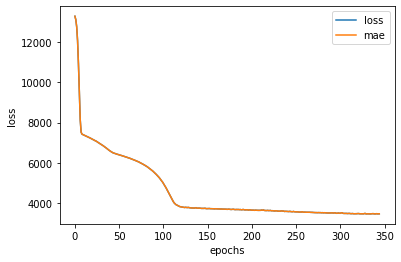

In [70]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalisation and standardisation)

### Steps in modelling with TensorFlow:

1. Turn all data into numbers(neural networks can not handle strings).
2. Make sure all the tensors are of the right shape.
3. Scale features (normalise or standardise, neural networks tend to prefer normalised)

**Normalisation:**

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is **to change the values of numeric columns in the dataset to use a common scale**, without distorting differences in the ranges of values or losing information.


Explore the current data

In [72]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


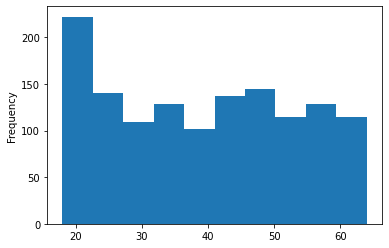

In [71]:
X['age'].plot(kind='hist')

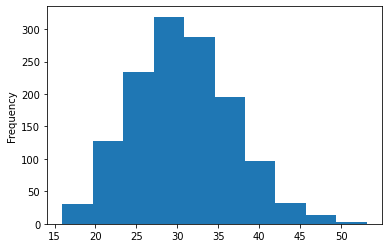

In [73]:
X['bmi'].plot(kind='hist')

In [74]:
X['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

### Starting fresh

In [75]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

To prepare our data, we can use some classes in Scikit-Learn

---



In [79]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [81]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # Turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# Create X & y values

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build the train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalisation (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

What does our data look like now?



In [83]:
# original
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [84]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [85]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has now been **normalised** and **one hot encoded**. Now we will build a neural network model on it.

In [86]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
history = model_1.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [88]:
model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


[3171.577392578125, 3171.577392578125]

Text(0.5, 0, 'epochs')

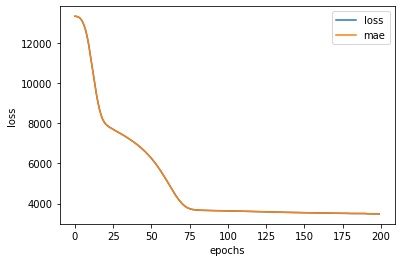

In [89]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')


**model_8**

In [92]:
# Set random seed
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
# This callback will stop the training when there is no improvement in
# the loss for twenty consecutive epochs.


# 1. Create the model

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
history = model_8.fit(X_train_normal, y_train, epochs=1000, callbacks=[callback], verbose=0)

In [93]:
model_8.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3159.0962 - mae: 3159.0962


[3159.09619140625, 3159.09619140625]

Text(0.5, 0, 'epochs')

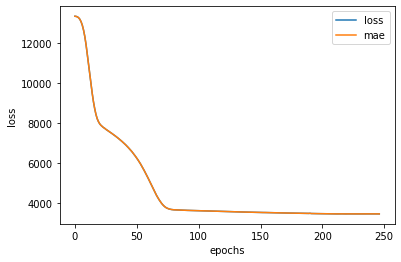

In [94]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')